In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread('DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

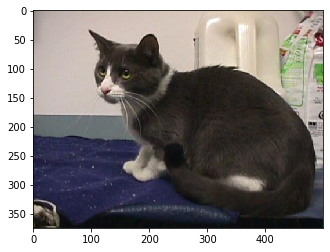

In [3]:
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

In [5]:
dog2 = cv2.imread('DATA/CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [6]:
dog2.shape

(199, 188, 3)

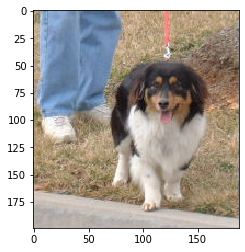

In [7]:
plt.imshow(dog2)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [9]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

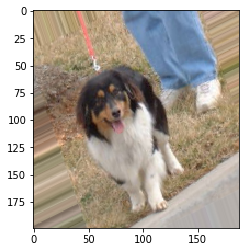

In [10]:
plt.imshow(image_gen.random_transform(dog2))

In [12]:
image_gen.flow_from_directory('DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [13]:
image_gen.flow_from_directory('DATA/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [14]:
image_shape=(150,150,3)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

In [16]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
results = model.fit_generator(train_image_gen,epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
150/150 [==============================] - 122s 811ms/step - loss: 0.6974 - accuracy: 0.5225 - val_loss: 0.6819 - val_accuracy: 0.5573


In [25]:
from keras.models import load_model

In [29]:
results.history['accuracy']

[0.5225]

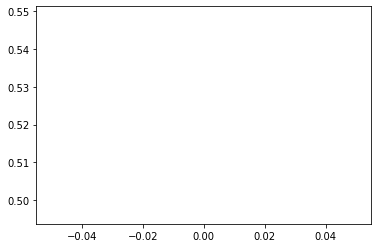

In [32]:
plt.plot(results.history['accuracy'])

In [33]:
import numpy as np
from keras.preprocessing import image

dog_file = 'DATA/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [34]:
prediction_prob = model.predict(dog_img)

In [35]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.5270705]] 
